In [1]:
import numpy as np

from triqs.gf import *
from triqs.gf.meshes import MeshDLRImFreq
from triqs.gf import make_gf_dlr, make_gf_dlr_imtime, make_gf_dlr_imfreq

from itertools import product

from triqs.plot.mpl_interface import oplot, plt

from gwsolver import GWSolver

In [24]:
def ExactG(mesh, t, U, interactions = True):
        U = U * int(interactions)
        
        c = np.sqrt(16 * t ** 2 + U ** 2)
        a = np.sqrt(2 * (16 * t ** 2 / ((c - U) ** 2) + 1))
        b = np.sqrt(2 * (16 * t ** 2 / ((c + U) ** 2) + 1))
    

        def g_up(i, j):
             return (-1) ** (i - j) * (inverse(iOmega_n - t) + (-1) ** (i - j) * inverse(iOmega_n + t)) / 2

        def g_dn(i, j):
              return (-1) ** (i - j) * (inverse(iOmega_n - t) + inverse(iOmega_n - t- U)) / 4 + ((1 + 4 * t / (c - U)) ** 2 * inverse(iOmega_n - t + (c - U) / 2) / a ** 2 + (1 - 4 * t / (c + U)) ** 2 * inverse(iOmega_n - t - (c + U) / 2) / b ** 2)
        
        G_up = Gf(mesh=mesh, target_shape = [2, 2])
        G_dn = Gf(mesh=mesh, target_shape = [2, 2])
        
        indices = (0, 1)
        for i, j in product(indices, indices):
            G_up[i, j] << g_up(i, j)
            G_dn[i, j] << g_dn(i, j)

        return BlockGf(block_list = [G_up, G_dn], name_list = ['up', 'dn'])
    
beta = 100.0
nw = 1024
t = 1.0
U = 1.5
fmesh = MeshImFreq(beta, 'Fermion', nw)
wf = [iw.imag for iw in fmesh.values()]

V = np.zeros((2, 2, 2, 2))
V[0, 0, 0, 0] = U
V[1, 1, 1, 1] = U

g0 = ExactG(fmesh, t, U, interactions = False)
ge = ExactG(fmesh, t, U, interactions = True)

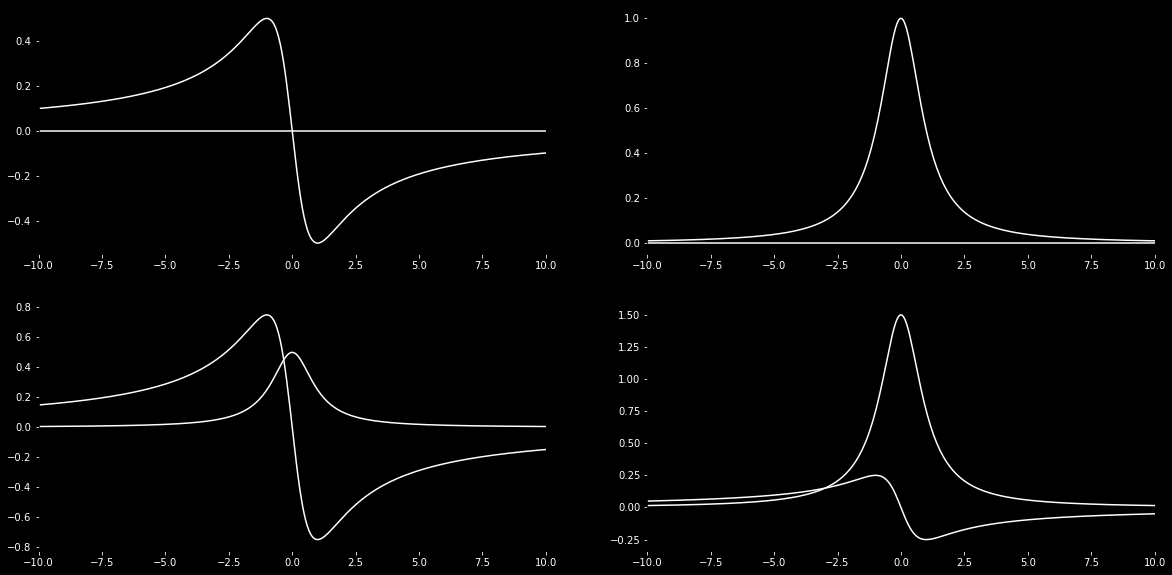

In [21]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10), facecolor = 'black')
axs[0,0].set_facecolor('black')
axs[0,0].xaxis.label.set_color('white')
axs[0,0].tick_params(axis = 'x', colors = 'white')
axs[0,0].yaxis.label.set_color('white')
axs[0,0].tick_params(axis = 'y', colors = 'white')
axs[0,0].set_xlim(-10, 10)


axs[0,0].plot(wf, g0['up'].data[:, 0, 0].real, color = 'white', zorder = 0)
axs[0,0].plot(wf, g0['up'].data[:, 0, 0].imag, color = 'white', zorder = 0)



axs[0,1].set_facecolor('black')
axs[0,1].xaxis.label.set_color('white')
axs[0,1].tick_params(axis = 'x', colors = 'white')
axs[0,1].yaxis.label.set_color('white')
axs[0,1].tick_params(axis = 'y', colors = 'white')
axs[0,1].set_xlim(-10, 10)


axs[0,1].plot(wf, g0['up'].data[:, 0, 1].real, color = 'white', zorder = 0)
axs[0,1].plot(wf, g0['up'].data[:, 0, 1].imag, color = 'white', zorder = 0)


axs[1,0].set_facecolor('black')
axs[1,0].xaxis.label.set_color('white')
axs[1,0].tick_params(axis = 'x', colors = 'white')
axs[1,0].yaxis.label.set_color('white')
axs[1,0].tick_params(axis = 'y', colors = 'white')
axs[1,0].set_xlim(-10, 10)


axs[1,0].plot(wf, g0['dn'].data[:, 0, 0].real, color = 'white', zorder = 0)
axs[1,0].plot(wf, g0['dn'].data[:, 0, 0].imag, color = 'white', zorder = 0)



axs[1,1].set_facecolor('black')
axs[1,1].xaxis.label.set_color('white')
axs[1,1].tick_params(axis = 'x', colors = 'white')
axs[1,1].yaxis.label.set_color('white')
axs[1,1].tick_params(axis = 'y', colors = 'white')
axs[1,1].set_xlim(-10, 10)


axs[1,1].plot(wf, g0['dn'].data[:, 0, 1].real, color = 'white', zorder = 0)
axs[1,1].plot(wf, g0['dn'].data[:, 0, 1].imag, color = 'white', zorder = 0)

plt.show()

In [15]:
gw = GWSolver(g0, V, hartree_flag = True, fock_flag = False)

P = gw.P_w
W = gw.W_w
sigma = gw.sigma_w
g_w = gw.g_w

wb = [iw.imag for iw in P.mesh.values()]

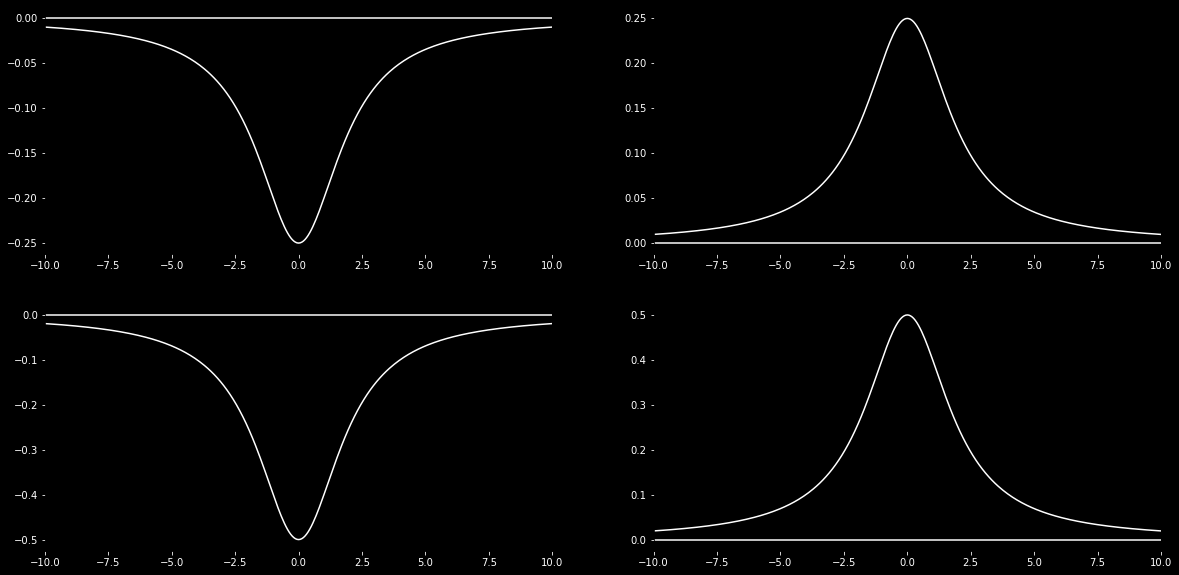

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10), facecolor = 'black')
axs[0,0].set_facecolor('black')
axs[0,0].xaxis.label.set_color('white')
axs[0,0].tick_params(axis = 'x', colors = 'white')
axs[0,0].yaxis.label.set_color('white')
axs[0,0].tick_params(axis = 'y', colors = 'white')
axs[0,0].set_xlim(-10, 10)


axs[0,0].plot(wb, P['up'].data[:, 0, 0, 0, 0].real, color = 'white', zorder = 0)
axs[0,0].plot(wb, P['up'].data[:, 0, 0, 0, 0].imag, color = 'white', zorder = 0)



axs[0,1].set_facecolor('black')
axs[0,1].xaxis.label.set_color('white')
axs[0,1].tick_params(axis = 'x', colors = 'white')
axs[0,1].yaxis.label.set_color('white')
axs[0,1].tick_params(axis = 'y', colors = 'white')
axs[0,1].set_xlim(-10, 10)


axs[0,1].plot(wb, P['up'].data[:, 1, 1, 0, 0].real, color = 'white', zorder = 0)
axs[0,1].plot(wb, P['up'].data[:, 1, 1, 0, 0].imag, color = 'white', zorder = 0)


axs[1,0].set_facecolor('black')
axs[1,0].xaxis.label.set_color('white')
axs[1,0].tick_params(axis = 'x', colors = 'white')
axs[1,0].yaxis.label.set_color('white')
axs[1,0].tick_params(axis = 'y', colors = 'white')
axs[1,0].set_xlim(-10, 10)


axs[1,0].plot(wb, P['dn'].data[:, 0, 0, 0, 0].real, color = 'white', zorder = 0)
axs[1,0].plot(wb, P['dn'].data[:, 0, 0, 0, 0].imag, color = 'white', zorder = 0)



axs[1,1].set_facecolor('black')
axs[1,1].xaxis.label.set_color('white')
axs[1,1].tick_params(axis = 'x', colors = 'white')
axs[1,1].yaxis.label.set_color('white')
axs[1,1].tick_params(axis = 'y', colors = 'white')
axs[1,1].set_xlim(-10, 10)


axs[1,1].plot(wb, P['dn'].data[:, 1, 1, 0, 0].real, color = 'white', zorder = 0)
axs[1,1].plot(wb, P['dn'].data[:, 1, 1, 0, 0].imag, color = 'white', zorder = 0)

plt.show()

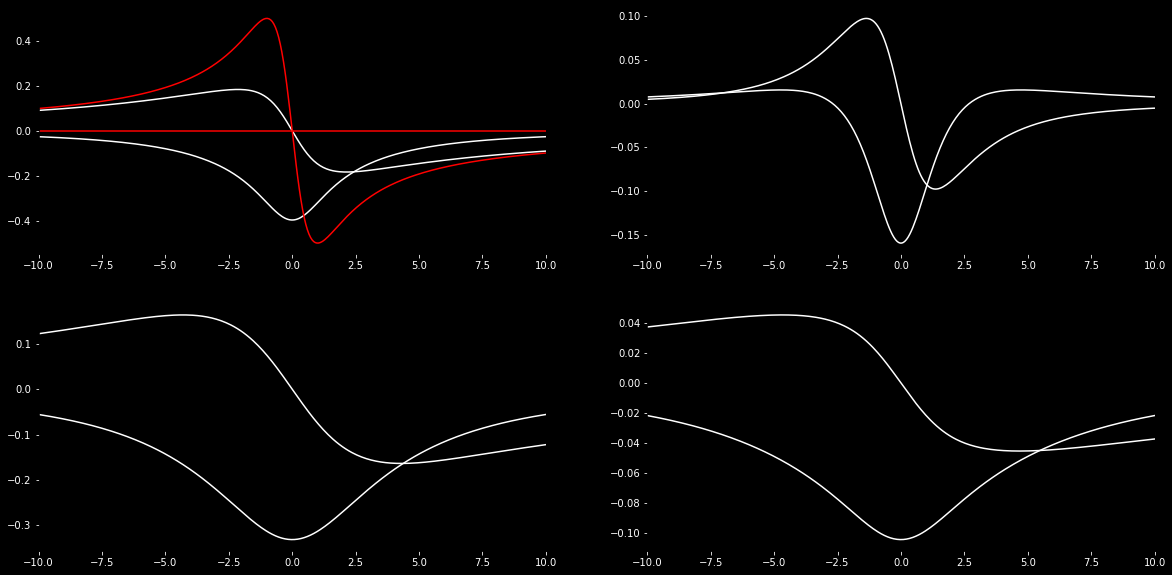

In [25]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10), facecolor = 'black')
axs[0,0].set_facecolor('black')
axs[0,0].xaxis.label.set_color('white')
axs[0,0].tick_params(axis = 'x', colors = 'white')
axs[0,0].yaxis.label.set_color('white')
axs[0,0].tick_params(axis = 'y', colors = 'white')
axs[0,0].set_xlim(-10, 10)


axs[0,0].plot(wf, g_w['up'].data[:, 0, 0].real, color = 'white', zorder = 0)
axs[0,0].plot(wf, g_w['up'].data[:, 0, 0].imag, color = 'white', zorder = 0)

axs[0,0].plot(wf, ge['up'].data[:, 0, 0].real, color = 'red', zorder = 0)
axs[0,0].plot(wf, ge['up'].data[:, 0, 0].imag, color = 'red', zorder = 0)



axs[0,1].set_facecolor('black')
axs[0,1].xaxis.label.set_color('white')
axs[0,1].tick_params(axis = 'x', colors = 'white')
axs[0,1].yaxis.label.set_color('white')
axs[0,1].tick_params(axis = 'y', colors = 'white')
axs[0,1].set_xlim(-10, 10)


axs[0,1].plot(wf, g_w['up'].data[:, 0, 1].real, color = 'white', zorder = 0)
axs[0,1].plot(wf, g_w['up'].data[:, 0, 1].imag, color = 'white', zorder = 0)


axs[1,0].set_facecolor('black')
axs[1,0].xaxis.label.set_color('white')
axs[1,0].tick_params(axis = 'x', colors = 'white')
axs[1,0].yaxis.label.set_color('white')
axs[1,0].tick_params(axis = 'y', colors = 'white')
axs[1,0].set_xlim(-10, 10)


axs[1,0].plot(wf, g_w['dn'].data[:, 0, 0].real, color = 'white', zorder = 0)
axs[1,0].plot(wf, g_w['dn'].data[:, 0, 0].imag, color = 'white', zorder = 0)



axs[1,1].set_facecolor('black')
axs[1,1].xaxis.label.set_color('white')
axs[1,1].tick_params(axis = 'x', colors = 'white')
axs[1,1].yaxis.label.set_color('white')
axs[1,1].tick_params(axis = 'y', colors = 'white')
axs[1,1].set_xlim(-10, 10)


axs[1,1].plot(wf, g_w['dn'].data[:, 0, 1].real, color = 'white', zorder = 0)
axs[1,1].plot(wf, g_w['dn'].data[:, 0, 1].imag, color = 'white', zorder = 0)

plt.show()